## RETO
Obtener el resto de información de una nota:
- Titulo
- fecha
- copete
- volanta
- cuerpo 
- autor

- obtener contenido multimedia (utilizamos la libreria YPython.display)

In [1]:
import requests
from bs4 import BeautifulSoup
from IPython.display import Image

In [2]:
link_seccion='https://www.pagina12.com.ar/secciones/el-pais'
url = requests.get(link_seccion)
url.status_code
soup=BeautifulSoup(url.text, 'lxml')

In [3]:
def obtener_noticias(soup):
    lista_noticias=[]
    #obtener noticias promocionados
    noticias_promocionadas=soup.find('div', attrs={'class':'article-item__content'})
    if noticias_promocionadas:
        lista_noticias.append('https://pagina12.com.ar'+noticias_promocionadas.a.get('href'))

    #obtener resto de noticias
    resto_noticias=soup.find('section', attrs={'class':'list-content'})
    for i in resto_noticias.find_all('div', attrs={'class':'article-item__header'}):
        if i.a:
            lista_noticias.append('https://pagina12.com.ar'+i.a.get('href'))
    lista_noticias


    return lista_noticias

In [4]:
lista_noticias = obtener_noticias(soup)
lista_noticias

['https://pagina12.com.ar/510370-acampe-en-reclamo-por-una-navidad-sin-hambre',
 'https://pagina12.com.ar/510362-el-gobierno-de-la-ciudad-no-adhiere-a-los-asuetos-administra',
 'https://pagina12.com.ar/510322-como-y-cuando-aplica-la-baja-de-impuestos-que-anuncio-rodrig',
 'https://pagina12.com.ar/510315-los-chats-del-lawfare-avanza-en-la-uba-el-juicio-academico-a',
 'https://pagina12.com.ar/510294-milagro-sala-sufrio-una-nueva-trombosis-y-exigen-que-sea-tra',
 'https://pagina12.com.ar/510286-carrio-da-por-retirado-a-macri-ya-fue',
 'https://pagina12.com.ar/510337-ricardo-quintela-fallar-a-favor-de-larreta-significa-menos-r',
 'https://pagina12.com.ar/510163-unidad-piquetera-inicia-un-acampe-frente-al-ministerio-de-de',
 'https://pagina12.com.ar/510166-en-el-pro-se-pelean-hasta-por-el-regreso-de-la-seleccion-arg',
 'https://pagina12.com.ar/510172-frutas-de-la-economia-popular-para-los-comedores',
 'https://pagina12.com.ar/510197-las-razones-de-otro-sesion-fallida-en-la-camara-de-diputad

In [5]:
#selecionamos el primer elemento de nuestro array que corresponde a una nota
link_nota= lista_noticias[0]
try:
    #hacemos la peticion de la web
    nota=requests.get(link_nota)
    #verificamos la respuesta del servidor sea 200
    if nota.status_code==200:
        #parseamos nuestra pagina web para analizar
        soup_nota=BeautifulSoup(nota.text, 'lxml')
        #extraemos el titulo de la nota
        titulo = soup_nota.find('h1').text
        print('Titulo: ',titulo)
        #extraemos la fecha de la nota
        fecha = soup_nota.find('time').get_text()
        print('Fecha: ',fecha)
        #extraemos el copete
        copete= soup_nota.find('h4').get_text()
        print('Copete: ',copete)
        #extraemos la volanta
        volanta= soup_nota.find('h3').get_text()
        print('Volanta: ',volanta)
        #extraemos el cuerpo de la nota
        cuerpo= soup_nota.find('div', attrs={'class':'article-main-content article-text'}).find_all('p')
        for c in cuerpo:
                print (c.get_text())
        #extraemos el autor de la nota
        autor= soup_nota.find('div', attrs={'class':'author-name'}).get_text()
        print ('autor: ', autor)

except Exception as e:
    print ('Error')
    print (e)
    print ('\n')

Titulo:  Acampe en reclamo por "una Navidad sin hambre"
Fecha:  22 de diciembre de 2022 - 14:43
Copete:  "El fallo de la Corte Suprema es una verdadera inmundicia"
Volanta:  La Unidad Piquetera se concentra frente al Ministerio de Desarrollo Social
Miles de manifestantes de la Unidad Piquetera se concentran frente a Desarrollo Social contra el recorte en las políticas de asistencia. Reclaman alimentos para los comedores populares y rechazan las bajas en el Potenciar Trabajo, con la advertencia de que permanecerán acampando por tiempo indeterminado sobre la avenida 9 de Julio, si no tienen respuestas de la ministra Victoria Tolosa Paz. Simultáneamente, en la Plaza de Mayo permanece otro acampe, el de la Tupac Amaru, en demanda al presidente de un indulto para Milagro Sala. 
Eduardo Belliboni, titular del Polo Obrero, señaló que los comedores y merenderos de su organización aún están esperando que les entreguen los alimentos que Desarrollo Social tenía comprometido mandarles el 1 de dici

In [6]:
#parseamos el tag div que contiene la imagen de la nota
media = soup_nota.find('div', attrs={'class':'article-main-media-image__container'})
media

<div class="article-main-media-image__container"><div class="image-wrapper"><figure><figure class="object-fit-block--contain intrinsic-container intrinsic-container-3x2"><img alt="" class="" src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2022-12/682434-piqueteros-202.jpg?itok=eP9KfVYU"/></figure></figure></div></div>

In [7]:
#verificamos que nuestro elemento tenga un valor
# si es asi-> seleccionamos el propiedad img de nuestro tag
if len(media):
    imagen=media.img.get('src')
    print (imagen)
else:
    print ('no se encontraron imagenes')

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2022-12/682434-piqueteros-202.jpg?itok=eP9KfVYU


In [8]:
#solicitamos por medio de resquets la imagen de la nota
imagen_req=requests.get(imagen)
imagen_req.status_code

200

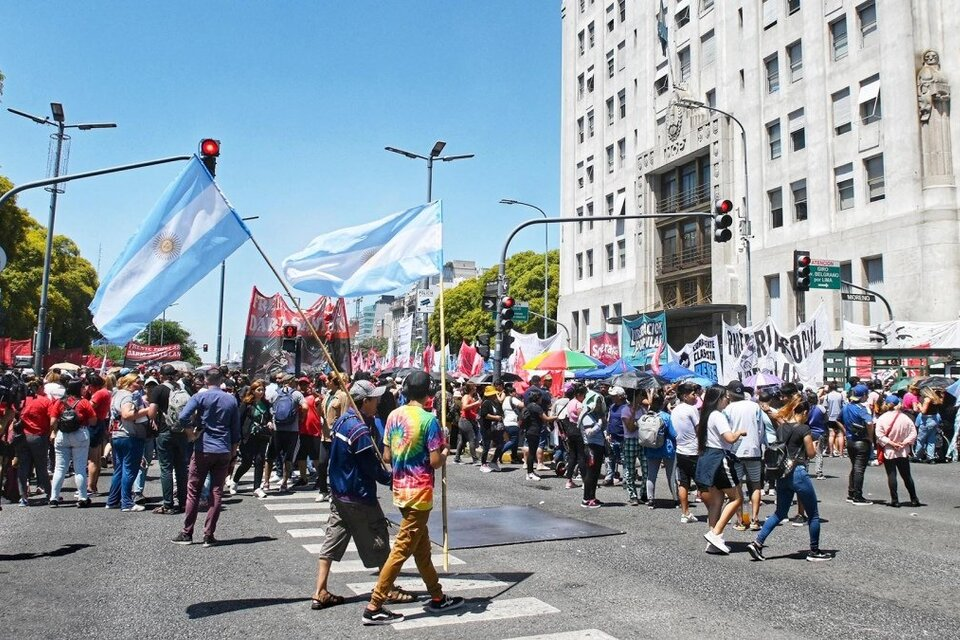

In [9]:
#utilizamos la libreria de imagen de python y llamamos a nuestro resquets de imagen
Image(imagen_req.content)